<a href="https://colab.research.google.com/github/OlhaYastrebova/goit-ds-hw/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Розпакування архіву
zip_file_path = '/content/data.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# 2. Завантаження CSV файлів
data_2d = pd.read_csv('/content/data/data_2d.csv')
mnist = pd.read_csv('/content/data/mnist.csv')

data_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [2]:
mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 3. Масштабування даних
scaler = StandardScaler()
X_two_d_scaled = scaler.fit_transform(data_2d.values)
X_mnist_scaled = scaler.fit_transform(mnist.values)

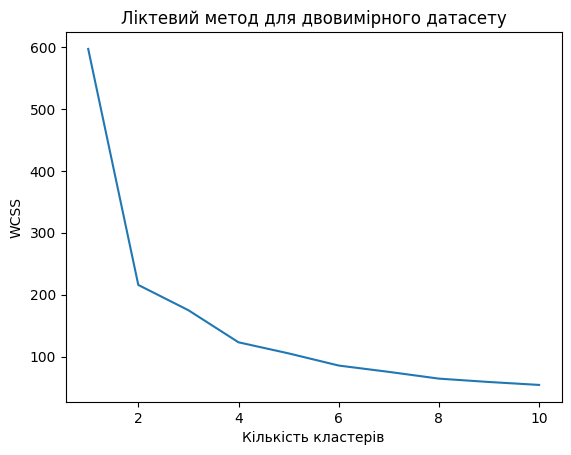

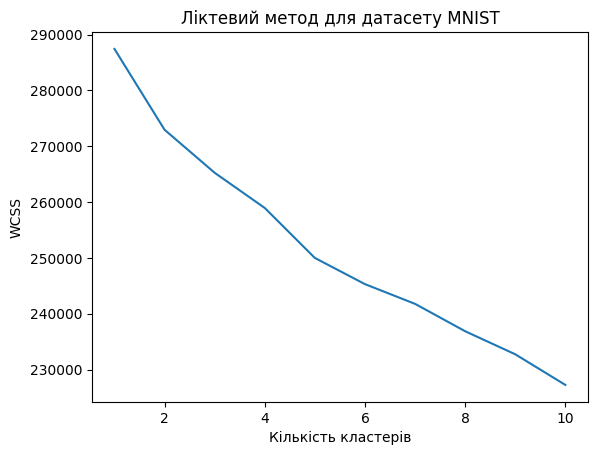

In [4]:
# 4. Ліктевий метод для двовимірного датасету
def plot_elbow_method(X, title):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init="auto", random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title(title)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(X_two_d_scaled, 'Ліктевий метод для двовимірного датасету')
plot_elbow_method(X_mnist_scaled, 'Ліктевий метод для датасету MNIST')

In [13]:
# 5. Визначення оптимальної кількості кластерів
optimal_clusters_two_d = 4
optimal_clusters_mnist = 5

In [14]:
# 6. Кластеризація за допомогою K-means
kmeans_two_d = KMeans(n_clusters=optimal_clusters_two_d, n_init=10, random_state=42)
kmeans_two_d.fit(X_two_d_scaled)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [7]:
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init=10, random_state=42)
kmeans_mnist.fit(X_mnist_scaled)


KMeans(n_clusters=5, n_init=10, random_state=42)

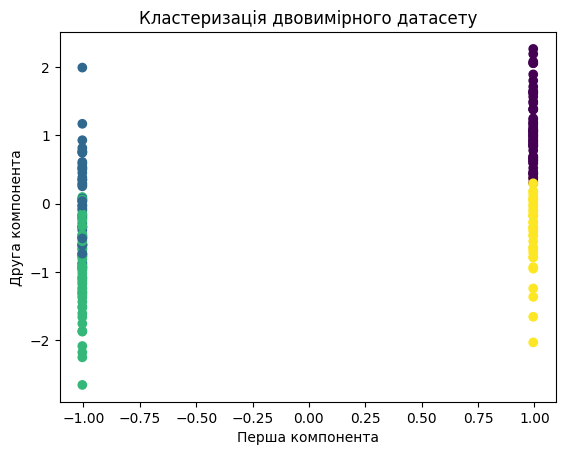

In [15]:
# 7. Візуалізація кластеризації для двовимірного датасету
plt.scatter(X_two_d_scaled[:, 0], X_two_d_scaled[:, 1], c=kmeans_two_d.labels_, cmap='viridis')
plt.title('Кластеризація двовимірного датасету')
plt.xlabel('Перша компонента')
plt.ylabel('Друга компонента')
plt.show()

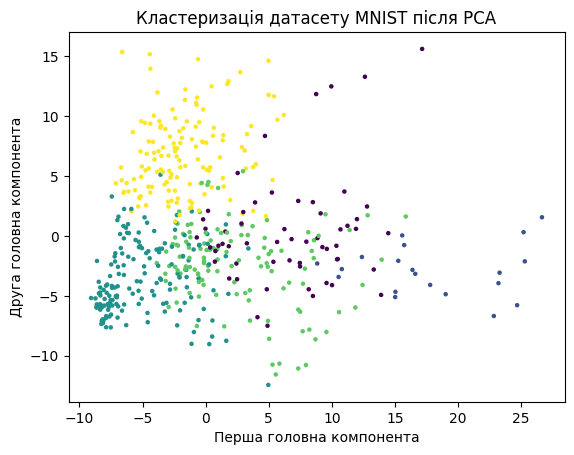

In [9]:
 # 8. Зменшення розмірності MNIST за допомогою PCA
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist_scaled)

# 9. Візуалізація кластеризації для датасету MNIST
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=kmeans_mnist.labels_, cmap='viridis', s=5)
plt.title('Кластеризація датасету MNIST після PCA')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()